In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, roc_curve, auc

# Loading the csv file

In [11]:
file = ('mental_health_workplace_survey.csv')
df = pd.read_csv(file)

# Encoding categorical features

In [3]:
categorical_cols = df.select_dtypes(include='object').columns.tolist()
numerical_cols = df.select_dtypes(exclude='object').columns.tolist()

le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col].astype(str))

# Train-test split

In [4]:
df['BurnoutRisk'] = df['BurnoutRisk'].astype(int)
X = df.drop("BurnoutRisk", axis=1)
y = df["BurnoutRisk"]
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=5)

# Standardization

In [5]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Models

In [6]:
models = {
    'Logistic': LogisticRegression(max_iter=1000),
    'LDA': LinearDiscriminantAnalysis()
}

# Training the Models

In [8]:
for model_name, model in models.items():
    print(f"Training {model_name} model")
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f"{model_name} trained - Accuracy: {accuracy:.2f}, ROC-AUC score: {roc_auc:.2f}, Confusion Matrix: {conf_matrix}")

Training Logistic model
Logistic trained - Accuracy: 0.99, ROC-AUC score: 1.00, Confusion Matrix: [[408   4]
 [  1 187]]
Training LDA model
LDA trained - Accuracy: 0.96, ROC-AUC score: 1.00, Confusion Matrix: [[390  22]
 [  0 188]]


#  ROC curve

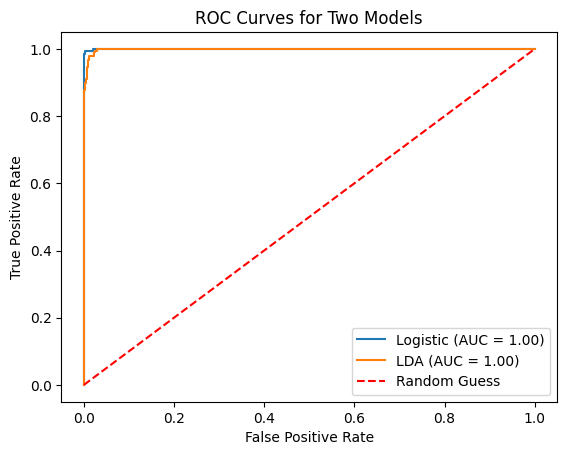

In [9]:
test_df = pd.DataFrame(
    {'True': y_test, 'Logistic': models['Logistic'].predict_proba(X_test)[:, 1], 'LDA': models['LDA'].predict_proba(X_test)[:, 1] })
for model in ['Logistic', 'LDA']:
    fpr, tpr, _ = roc_curve(test_df['True'], test_df[model])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Two Models')
plt.legend()
plt.show()

# Summary:
<h3>For above mental_health_workplace_survey.csv the Logistic model did better with an Accuracy of 0.99 and an ROC-AUC score of 1.00, while the LDA model scored a bit lower with an Accuracy of 0.96 and the same ROC-AUC of 1.00. Both models are awesome at telling apart burnout and no burnout since their ROC-AUC is perfect. But Logistic wins by a tiny bit because its Accuracy is higher (0.99 vs. 0.96), meaning it messed up less overall. Looking at the confusion matrix, Logistic only got 5 guesses wrong (4 false positives, 1 false negative), while LDA had 22 (all false positives), so Logistic comes out on top! Logistic is better because it handles the data patterns more precisely, likely due to its flexibility in fitting the decision boundary, whereas LDA assumes equal variance across groups, which might not fit this dataset perfectly, leading to more false positives.<h3>